In [2]:
# webscrape 20 images each of 10 anime characters
# save images to folder

import os
from bing_image_downloader import downloader
import shutil

# create folder to save images if it doesn't exist
if not os.path.exists('images'):
    os.mkdir('images')

# create list of anime characters
characters = ['Narendra Modi', 'Leonardo DiCaprio', 'Tom Cruise']

#delete all folders which are not in characters
for folder in os.listdir('images'):
    if folder not in characters:
        shutil.rmtree('images/' + folder)

In [3]:
# %%script false --no-raise-error
# loop through each character
for character in characters:
    # download 20 images of each character
    downloader.download(character+" face", limit=10, output_dir='images/', adult_filter_off=True, force_replace=False, timeout=60, verbose=False, filter="photo")

[%] Downloading Images to d:\DSLab\ML\EigenFaces\images\Narendra Modi face
[!] Issue getting: https://i1.wp.com/www.celebrity-cutouts.co.uk/wp-content/uploads/2018/03/narendra-modi-celebrity-mask.png?fit=1200%2C600&amp;ssl=1
[!] Error:: HTTP Error 404: File Not Found


[%] Done. Downloaded 10 images.
[%] Downloading Images to d:\DSLab\ML\EigenFaces\images\Leonardo DiCaprio face
[!] Issue getting: https://www.partypeople.company/uploads/1/7/6/2/17627711/s454377924454347902_p98_i66_w826.jpeg
[!] Error:: HTTP Error 404: Not Found
[Error]Invalid image, not saving https://all4desktop.com/data_images/original/4242435-face.jpg

[!] Issue getting: https://all4desktop.com/data_images/original/4242435-face.jpg
[!] Error:: Invalid image, not saving https://all4desktop.com/data_images/original/4242435-face.jpg

[!] Issue getting: https://media1.popsugar-assets.com/files/thumbor/TAacQINMC2pS4Ggt8Jcv7T7NvnQ/fit-in/1024x1024/filters:format_auto-!!-:strip_icc-!!-/2017/02/24/238/n/4852708/5519575d2a9db

In [4]:
# create face only images
import cv2
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

# create folder to save images if it doesn't exist
if not os.path.exists('images_512_face'):
    os.mkdir('images_512_face')

for folder in os.listdir('images_512_face'):
    if folder not in characters:
        shutil.rmtree('images_512_face/' + folder)

# loop through each character
for character in characters:
    # create folder to save images if it doesn't exist
    if not os.path.exists('images_512_face/' + character):
        os.mkdir('images_512_face/' + character)
    # loop through each image
    for image in os.listdir('images/' + character+" face"):
        # read image
        imgOG = cv2.imread('images/' + character+" face" + '/' +image)
        # Convert into grayscale
        img = cv2.cvtColor(imgOG, cv2.COLOR_BGR2GRAY)
        # detect faces
        face = face_cascade.detectMultiScale(img, 1.1, 4)
        #crop face
        for (x, y, w, h) in face:
            imgOG = imgOG[y:y+h, x:x+w]
        # resize image
        imgOG = cv2.resize(imgOG, (256, 256))
        # save image
        cv2.imwrite('images_512_face/' + character + '/' + image, imgOG)


,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,22.113344,17.146428,10.246951,10.246951,10.246951,17.146428,17.146428,10.246951,10.246951,20.832667,...,24.939928,15.811388,20.346990,18.601075,17.720045,12.688578,17.916473,22.113344,17.000000,19.131126
1,20.049938,15.264338,8.944272,18.110770,17.117243,19.723083,20.832667,14.456832,17.464249,20.223748,...,22.494444,23.173260,17.832555,20.904545,21.679483,17.349352,25.729361,23.895606,22.583180,14.764823
2,14.594520,18.708287,8.124038,21.095023,21.954498,18.411953,18.165902,17.291616,21.118712,21.118712,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,19.646883,19.646883,19.646883,19.646883,19.849433,19.849433,18.894444,18.894444,21.283797,21.771541,...,11.747340,11.747340,18.601075,18.601075,18.601075,18.601075,18.601075,18.601075,18.601075,18.601075
4,14.764823,14.764823,14.764823,14.764823,14.764823,14.764823,14.764823,14.764823,14.764823,14.764823,...,16.062378,16.062378,16.062378,16.062378,16.062378,16.062378,16.062378,16.062378,16.062378,16.062378
5,27.037012,15.811388,8.774964,13.038405,18.138357,19.339080,18.601075,21.118712,10.049876,5.385165,...,2.236068,2.236068,7.071068,3.741657,21.213203,2.236068,3.464102,5.196152,1.732051,0.000000
6,19.544820,16.763055,16.031220,13.892444,7.549834,19.131126,17.233688,19.000000,21.679483,18.601075,...,12.845233,6.708204,12.206556,22.226111,7.071068,18.466185,15.811388,13.784049,12.041595,19.621417
7,11.747340,11.747340,14.282857,17.748239,16.792856,13.152946,20.322401,12.206556,5.830952,22.693611,...,20.808652,20.808652,20.808652,20.808652,20.808652,20.808652,20.808652,20.808652,20.808652,20.808652
8,10.295630,17.349352,16.552945,14.764823,20.420578,17.000000,19.442222,24.248711,22.516660,22.226111,...,10.392305,16.822604,19.416488,13.379088,12.124356,7.681146,9.433981,11.045361,8.774964,10.488088
9,21.863211,21.863211,21.863211,21.863211,20.904545,20.904545,20.904545,17.029386,23.108440,21.954498,...,22.869193,16.370706,14.696938,26.888659,20.469489,12.806248,10.816654,15.394804,18.439089,21.794495


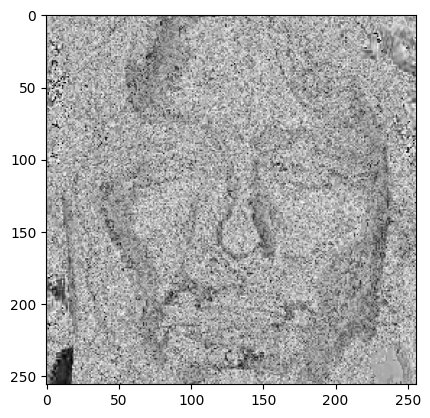

In [20]:
# create dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df=pd.DataFrame()

def clamp(n, minn, maxn): return max(min(maxn, n), minn)

# loop through every image
for character in characters:
    for image in os.listdir('images_512_face/' + character):
        # read image
        img = cv2.imread('images_512_face/' + character + '/' + image)
        #make single channel
        imgFlat=np.zeros((256,256))
        for i in range(256):
            for j in range(256):
                imgFlat[i][j] = clamp(np.sqrt(np.square(img[i][j]).sum()),0,255)
        plt.imshow(imgFlat, cmap='gray')
        #flatten image
        # imgFlat = img.flatten()
        imgFlat = imgFlat.flatten()
        # add image to dataset
        df = pd.concat([df, pd.DataFrame(imgFlat).T], ignore_index=True)
df

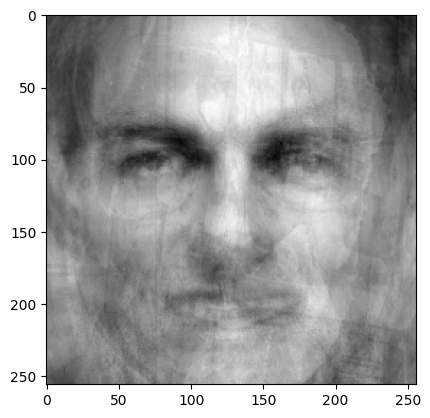

In [10]:
# Do PCA on dataset without SKlearn
# calculate mean of each column
mean = df.mean(axis=0)
#show mean face by unflattening
plt.imshow(mean.values[::3].reshape(256, 256), cmap='gray')
# # center data
# df = df - mean
# # calculate covariance matrix
# cov = np.cov(df.T)
# # calculate eigenvalues and eigenvectors
# eigenvalues, eigenvectors = np.linalg.eig(cov)
# # sort eigenvalues and eigenvectors
# eigenvectors = eigenvectors[:, eigenvalues.argsort()[::-1]]
# eigenvalues = eigenvalues[eigenvalues.argsort()[::-1]]
# # pick only top 20 eigenvectors
# eigenvectors = eigenvectors[:, :20]